# Projet optimisation : algorithme SDCA

Nous allons d'abord implémenter la version la plus classique de l'algorithme, avant de mettre en oeuvre les variantes et améliorations proposées dans http://www.jmlr.org/papers/volume14/shalev-shwartz13a/shalev-shwartz13a.pdf

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [352]:
np.random.seed(0)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def binarize(x):
    return np.sign(x-0.5)

n_samples, n_features = 500, 20
X = np.random.randn(n_samples, n_features)
w = np.random.randn(n_features)
b = binarize(sigmoid(X.dot(w) + 0*np.random.randn(n_samples)))
step_size = 1 #1.0 / (3 * np.max((A * A).sum(1)))      #ici on travaille toujours avec un step_size constant

#avec ces matr. A et B, on va résoudre un problème de minimisation (par les moindres carrés) de (||A*theta-b||^2)/(2n)

from numba import njit

def li(theta, i):
    return max(0, 1 - b[i]*(X[i].dot(theta)))


def l(theta):
    return np.mean([li(theta,i) for i in range(n_samples)])
               
               
def grad(theta):
    return - A.T.dot(b - np.dot(A, theta))

def partial_grad(theta, i):
    return - A[i] * (b[i] - np.dot(A[i], theta))

In [353]:
def SDCA(T, lam):
    alpha = np.zeros(n_samples)
    w = (1/(lam*n_samples))*np.dot(X.T,alpha)
    
    grad_history = np.empty(shape=[T/100])
    cost_history = np.empty(shape=[T/100])
    
    for t in range(0,T):
        # .. pick random sample ..
        idx = np.random.randint(0, n_samples)
        
        # on calcule les constantes A et B (utiles pour la résolution du delta alpha i)
        A = (1/(lam*n_samples)) * np.linalg.norm(X[idx])**2
        B = X[idx].T.dot(w)    
        
        y_i = b[idx]
        delta_alpha_i_tilde = (y_i-B)/A        
        delta_alpha_i = y_i * np.clip(y_i*(delta_alpha_i_tilde + alpha[idx]), a_min=0, a_max=1) - alpha[idx]
        
        alpha[idx] = alpha[idx] + delta_alpha_i
    
        w = (1/(lam*n_samples))*np.dot(X.T,alpha)
        
        if t % 100 == 0: 
            grad_history[t/100] = delta_alpha_i
            cost_history[t/100] = l(w)
        
    return w, grad_history, cost_history
        

In [354]:
theta, grad_history, cost_history = SDCA(10000,0.1)

In [355]:
l(theta)

0.20535610165529733

In [356]:
w

array([ -2.02117027e-01,  -8.33231001e-01,   1.73360025e+00,
         1.90649004e-01,  -1.77810394e-01,  -1.08502512e+00,
         9.72262333e-01,   1.43147168e+00,  -2.45073043e-01,
        -6.23253810e-01,  -3.95998866e-01,  -1.35852240e+00,
         1.32260253e+00,   3.44393843e-03,  -1.96770109e-04,
         1.53370396e+00,  -7.73082248e-01,  -4.01254937e-01,
        -1.15356764e-01,   1.01155545e+00])

In [357]:
theta

array([-0.08309172, -0.26444151,  0.65227634,  0.11542224, -0.09078421,
       -0.44039876,  0.42508507,  0.59910145, -0.0601714 , -0.18754532,
       -0.12091829, -0.54683435,  0.49944459,  0.06987245,  0.00862403,
        0.68521453, -0.26321408, -0.08320276, -0.06989204,  0.30048477])

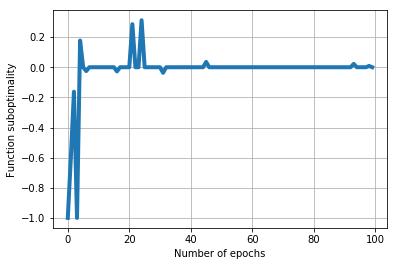

In [358]:
plt.plot(grad_history, lw=4)
plt.grid()
#plt.yscale('log')
plt.ylabel('Function suboptimality')
plt.xlabel('Number of epochs')
plt.show()

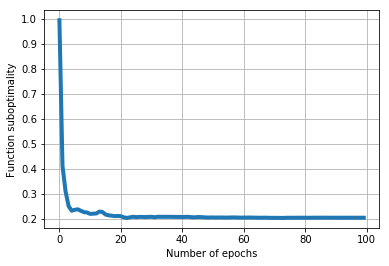

In [359]:
plt.plot(cost_history, lw=4)
plt.grid()
#plt.yscale('log')
plt.ylabel('Function suboptimality')
plt.xlabel('Number of epochs')
plt.show()